In [5]:
# SIRS Model, with custom radius r, a Moore neighbourhood, starting with a single infectious seed.
# and added a lockdown mechanism to reduce the radius of spread from r to 1. Since setting it to 0
# generates overly idealistic situations, I set the lockdown radius to 1 with a "lockdown factor"
# which can be varied between 0 and 1 (which is multiplied to prob of infection spread).
# 0=>strict lockdown, no contacts, hence it dies out quickly. 1=> radius=1 and infection spreads accordingly.

#put p_quar=0 to remove quarantine feature.

In [6]:
import numpy as np
from timeit import default_timer as timer
from colour import Color
from matplotlib import colors
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import gif

#CUSTOM CMAP
def customcmap(t_i, t_r):
    q = Color("#091221")
    s = Color("#f5ebeb")
    i1 = Color("#5e0202")
    i2 = Color("#e81717")
    r1 = Color("#e8c917")
    r2 = Color("#e8db90")
    clist =[q] + [s] + list(i1.range_to(i2, t_i)) + list(r1.range_to(r2, t_r))
    clist = [c.hex for c in clist]
    
    return colors.ListedColormap(clist)




#PROPOGATOR FUNCTION
def propogator(tau_t,x_dim,y_dim,t_i,t_r,det_prob,r,w_sum,bc_r,lf,days, p_quar): # lf is lockdown factor, bc_r is boundary condition radius
    #looping through all the blocks (except the boundaries)              # days are the number of days after which an infectious
                                                                         # person is transferred to quarantine centre
                                                                         # p_quar is prob of sending to quarantine!
    
    t=tau_t.copy()  #use .copy() to prevent simaltaneous changes in both t and tau_t
    count=0
    
    for i in np.arange(r,x_dim+bc_r):
        for j in np.arange(r,y_dim+bc_r):
        
            #for susceptible individuals (Using MOORE Neighbourhood)
            if(tau_t[i][j]==0):    
                count=0
                probability=0   
                
                for k in np.arange(-r,r+1):
                    for l in np.arange(-r,r+1):
                        if(1<=tau_t[i+k][j+l]<=t_i and (k,l)!=(0,0)):
                            w=max(abs(k),abs(l)) #weight of each cell
                            count=count+(r-(w-1))
                
                probability=(count/w_sum)*lf
                x=np.random.random()
                if(x<=probability*det_prob): #if det_prob=8, even a single infected neighbour can infect, for det_prob=1, we get the standard probabilistic model.
                    t[i][j]=1
                
            #for sending to quarantine with probabilty p_quar
            elif(tau_t[i][j]==days+1):
                ran=np.random.random()
                if(ran<=p_quar):
                    t[i][j]= -1
                else:
                    t[i][j]=t[i][j]+1
                
            #for infected and refractory
            elif(1<=tau_t[i][j]<t_i+t_r):
                t[i][j]=t[i][j]+1
                
            #last stage (tau_0----->0)
            elif(tau_t[i][j]==t_i+t_r):
                t[i][j]=0
    #BOUNDARY CONDITIONS (just recovered after getting infected)
    i=0
    for i in range(bc_r):                 #All borders of width = (radius) are fixed boundaries.
        t[:,i]=t_i+1
        t[i,:]=t_i+1
        t[:,y_dim+(2*bc_r-(i+1))]=t_i+1
        t[x_dim+(2*bc_r-(i+1)),:]=t_i+1
    
    return t


#for counting number of infected, refractory and susceptible individuals 
def datastats(state,x_dim, y_dim, t_i,t_r,r):
    qua=0
    inf=0
    ref=0
    sus=0
    for i in np.arange(r,x_dim+r):
        for j in np.arange(r,y_dim+r):
            if (state[i][j]== -1):
                qua=qua+1                
            if (state[i][j]==0):
                sus=sus+1
            if (1<=state[i][j]<=t_i):
                inf=inf+1
            if ((t_i+1)<=state[i][j]<=(t_i+t_r)):
                ref=ref+1
    
    return sus,inf,ref,qua

In [7]:
# (FOR A MIXED INITIAL POPULATION OF SUSCEPTIBLE AND INFECTED PEOPLE)

#INITIAL CONDITIONS


#Distribution of Initial Population

#p=0.00      # INITIAL FRACTION OF INFECTION

#tau_list=np.zeros(((x_dim + 2)*(y_dim + 2)), dtype=int)  

#for k in range ((x_dim + 2)*(y_dim + 2)):
#    rand=np.random.random()
#    if(0<=rand<p):
#        tau_list[k]=tau_list[k]+1
#    elif(p<=rand<=1):
#        tau_list[k]=tau_list[k]+0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


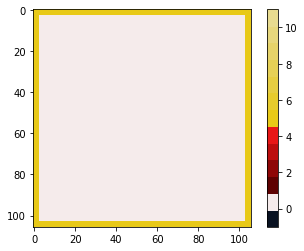

Runtime   150.35180490000005
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


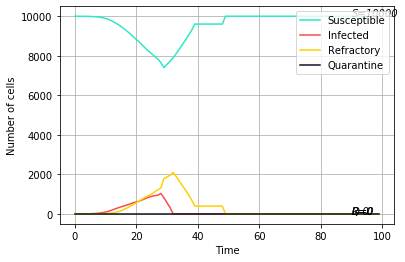

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


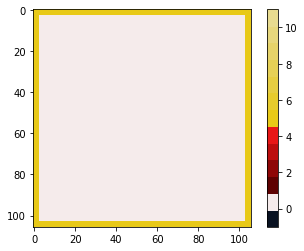

Runtime   143.63694440000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


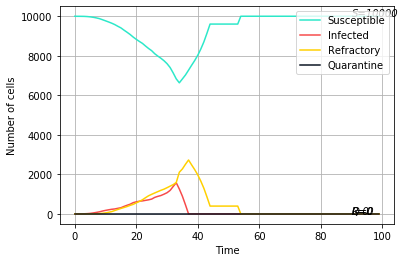

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


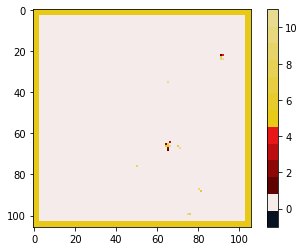

Runtime   120.20642010000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


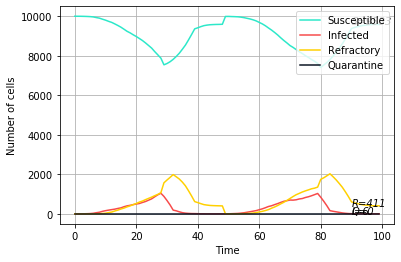

Susceptible = 9583
Infected = 6
Refractory = 411
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


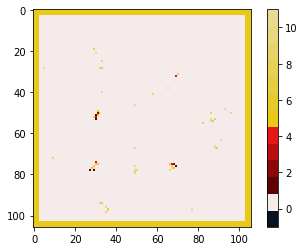

Runtime   120.04533129999993
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


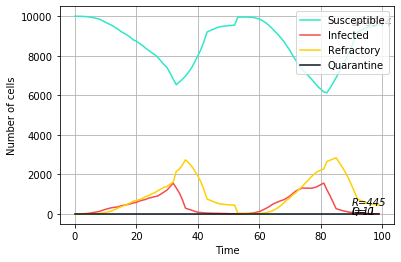

Susceptible = 9544
Infected = 11
Refractory = 445
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


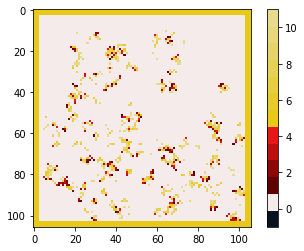

Runtime   99.11316979999992
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


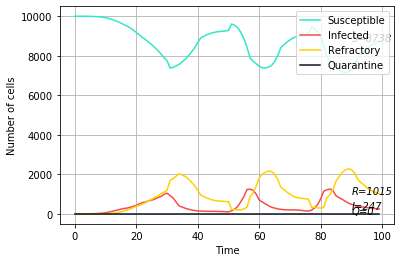

Susceptible = 8738
Infected = 247
Refractory = 1015
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


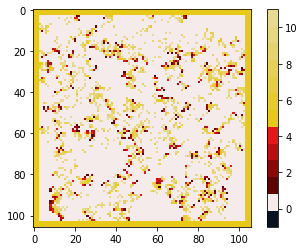

Runtime   104.41429289999996
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


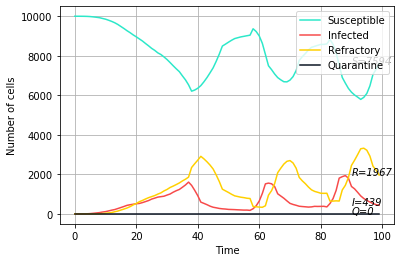

Susceptible = 7594
Infected = 439
Refractory = 1967
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


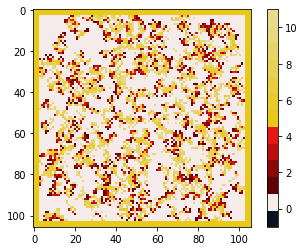

Runtime   92.05204170000002
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


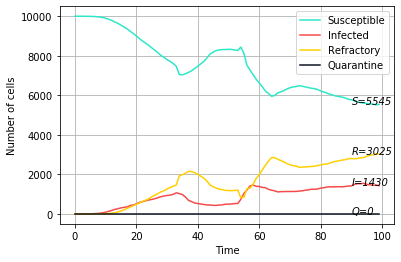

Susceptible = 5545
Infected = 1430
Refractory = 3025
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


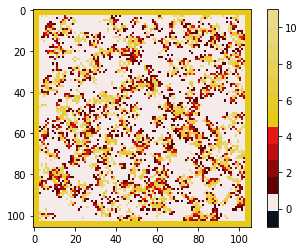

Runtime   94.16041470000005
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


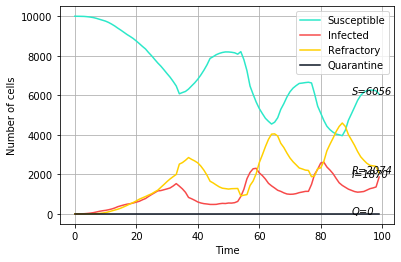

Susceptible = 6056
Infected = 1870
Refractory = 2074
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


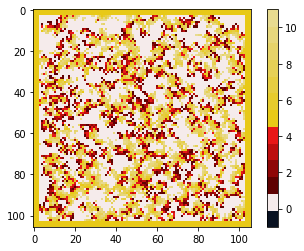

Runtime   83.92307819999996
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


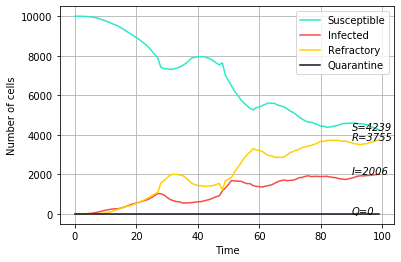

Susceptible = 4239
Infected = 2006
Refractory = 3755
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


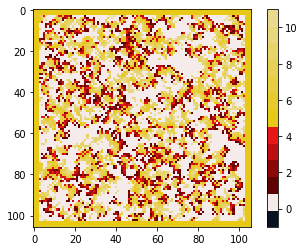

Runtime   84.84087410000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


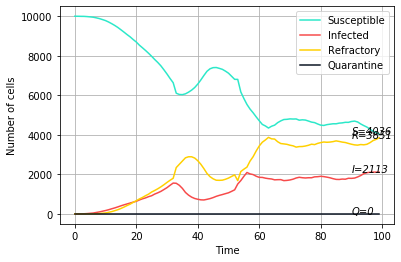

Susceptible = 4036
Infected = 2113
Refractory = 3851
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


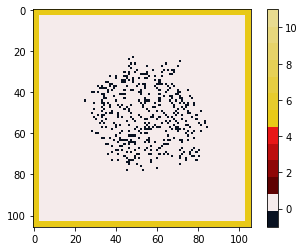

Runtime   142.24849280000012
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


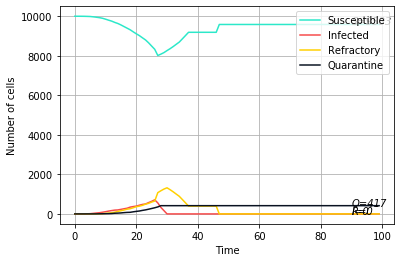

Susceptible = 9583
Infected = 0
Refractory = 0
Quarantined = 417


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


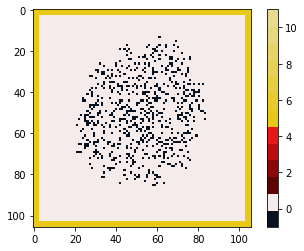

Runtime   137.09528219999993
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


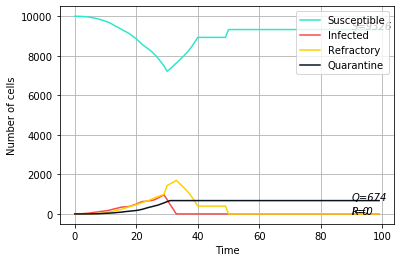

Susceptible = 9326
Infected = 0
Refractory = 0
Quarantined = 674


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


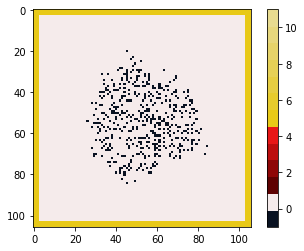

Runtime   140.6714239999999
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


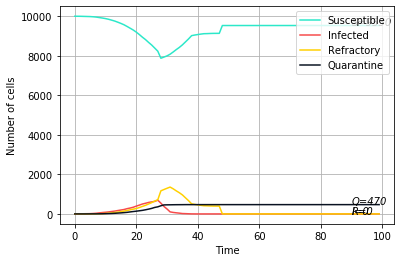

Susceptible = 9530
Infected = 0
Refractory = 0
Quarantined = 470


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


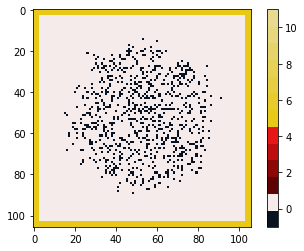

Runtime   136.83536279999976
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


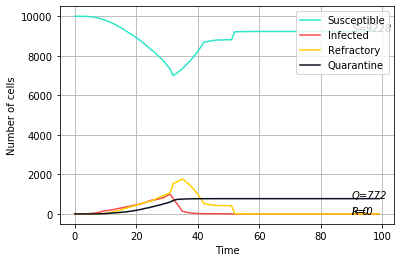

Susceptible = 9228
Infected = 0
Refractory = 0
Quarantined = 772


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


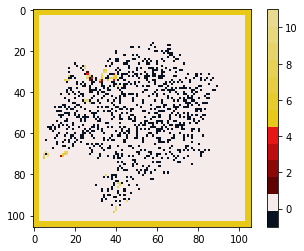

Runtime   97.79810679999991
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


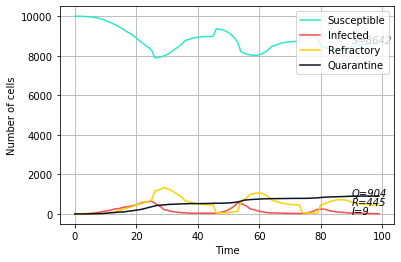

Susceptible = 8642
Infected = 9
Refractory = 445
Quarantined = 904


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


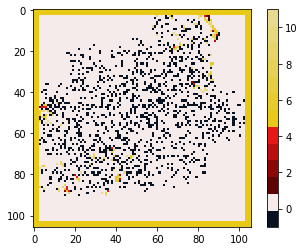

Runtime   100.07731620000004
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


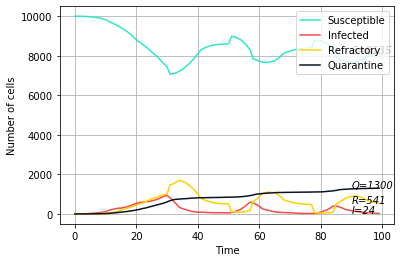

Susceptible = 8135
Infected = 24
Refractory = 541
Quarantined = 1300


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


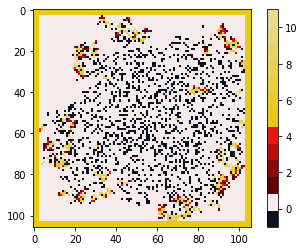

Runtime   86.1629684999998
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


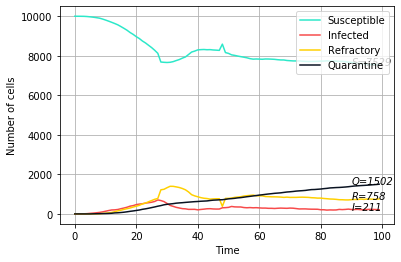

Susceptible = 7529
Infected = 211
Refractory = 758
Quarantined = 1502


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


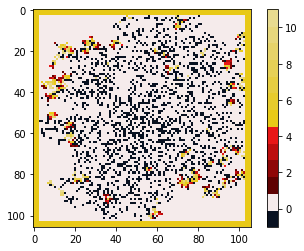

Runtime   91.38277759999983
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


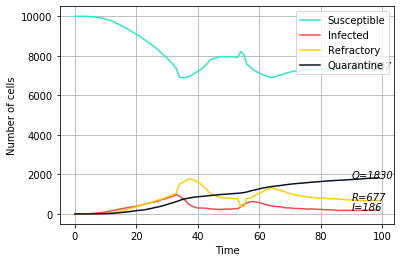

Susceptible = 7307
Infected = 186
Refractory = 677
Quarantined = 1830


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


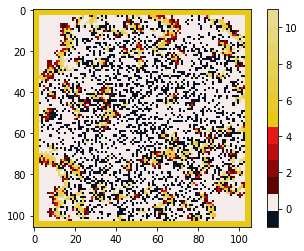

Runtime   83.18130090000022
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


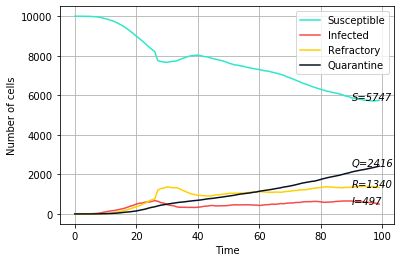

Susceptible = 5747
Infected = 497
Refractory = 1340
Quarantined = 2416


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


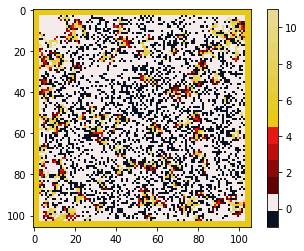

Runtime   81.62565489999997
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


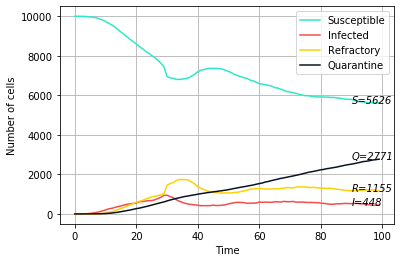

Susceptible = 5626
Infected = 448
Refractory = 1155
Quarantined = 2771


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


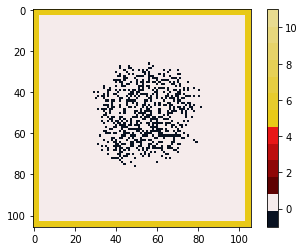

Runtime   135.58144440000024
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


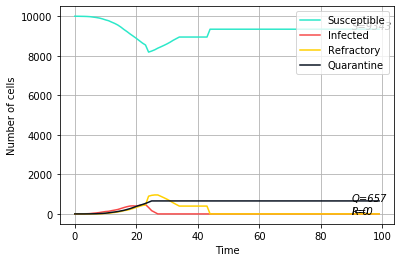

Susceptible = 9343
Infected = 0
Refractory = 0
Quarantined = 657


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


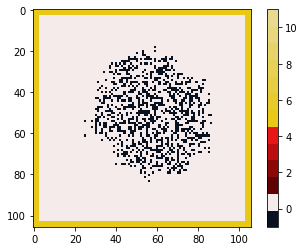

Runtime   133.5125683000001
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


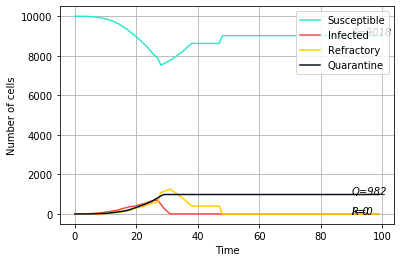

Susceptible = 9018
Infected = 0
Refractory = 0
Quarantined = 982


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


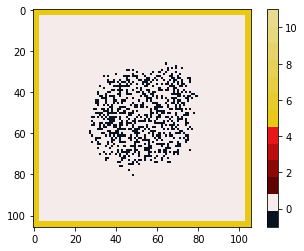

Runtime   136.3430659999999
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


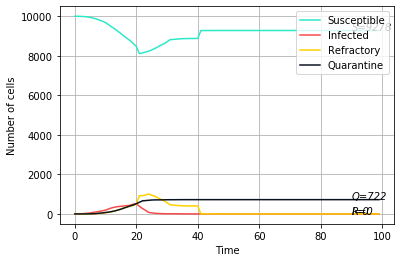

Susceptible = 9278
Infected = 0
Refractory = 0
Quarantined = 722


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


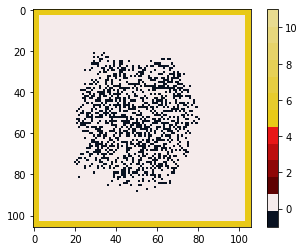

Runtime   132.86902220000002
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


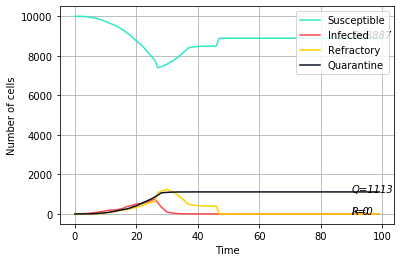

Susceptible = 8887
Infected = 0
Refractory = 0
Quarantined = 1113


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


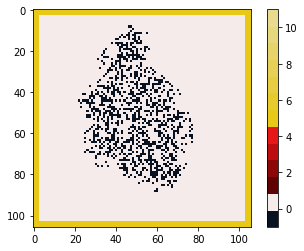

Runtime   91.28474979999964
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


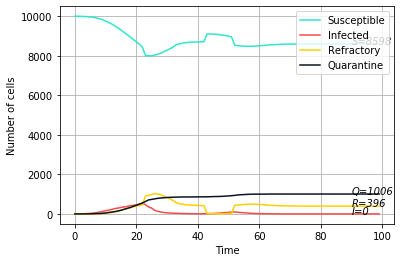

Susceptible = 8598
Infected = 0
Refractory = 396
Quarantined = 1006


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


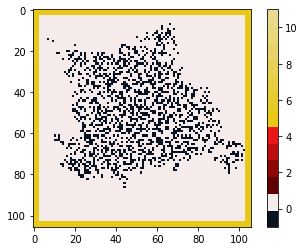

Runtime   91.99875189999966
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


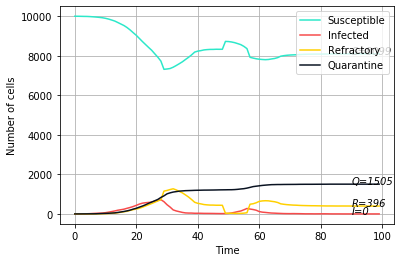

Susceptible = 8099
Infected = 0
Refractory = 396
Quarantined = 1505


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


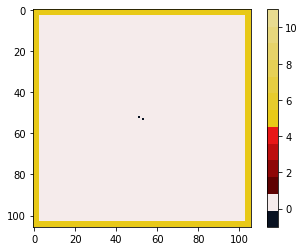

Runtime   167.7377330000004
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


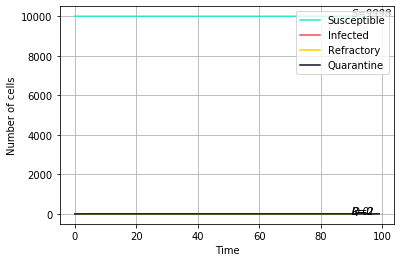

Susceptible = 9998
Infected = 0
Refractory = 0
Quarantined = 2


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


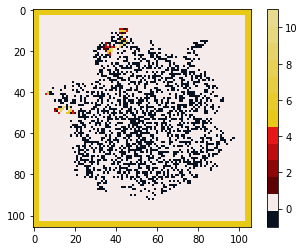

Runtime   89.62595569999985
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


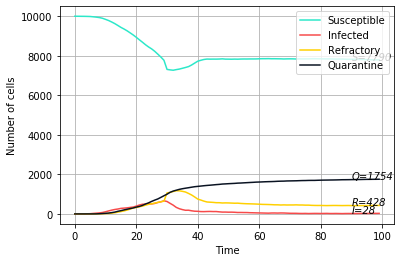

Susceptible = 7790
Infected = 28
Refractory = 428
Quarantined = 1754


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


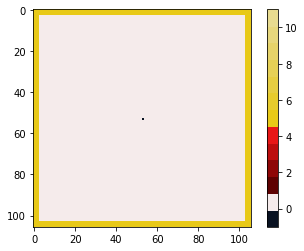

Runtime   170.55374200000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


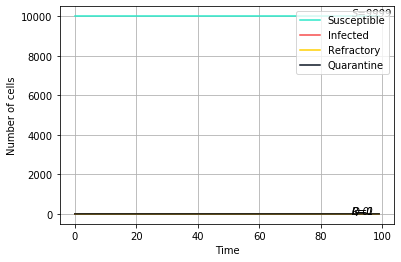

Susceptible = 9999
Infected = 0
Refractory = 0
Quarantined = 1


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


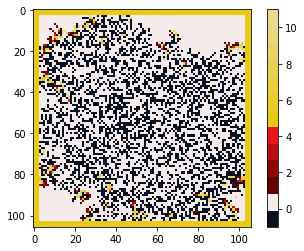

Runtime   84.08463699999993
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


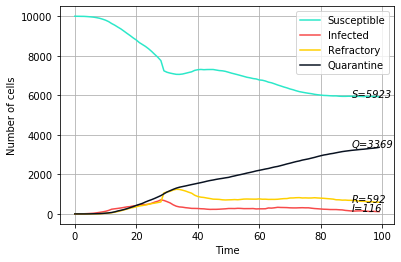

Susceptible = 5923
Infected = 116
Refractory = 592
Quarantined = 3369


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


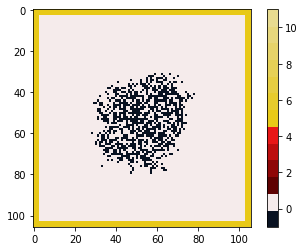

Runtime   139.6514404999998
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


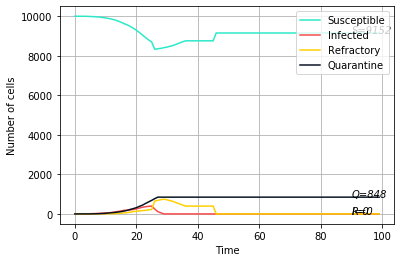

Susceptible = 9152
Infected = 0
Refractory = 0
Quarantined = 848


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


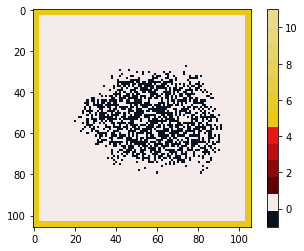

Runtime   136.73467170000004
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


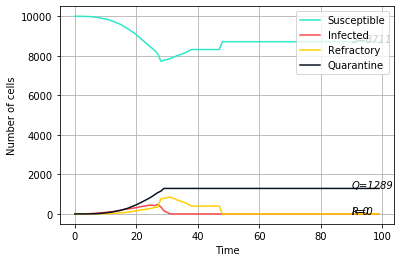

Susceptible = 8711
Infected = 0
Refractory = 0
Quarantined = 1289


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


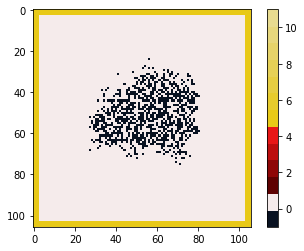

Runtime   144.61523639999996
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


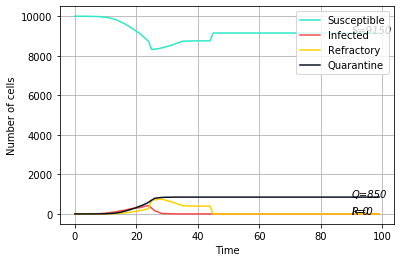

Susceptible = 9150
Infected = 0
Refractory = 0
Quarantined = 850


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


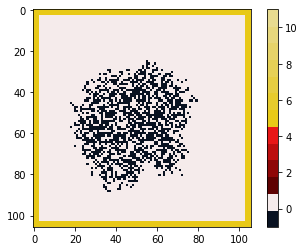

Runtime   137.45873389999997
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


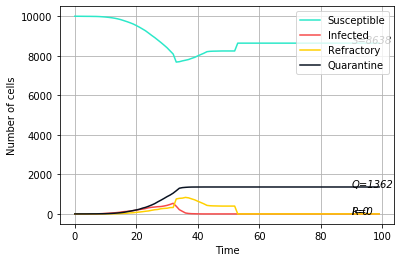

Susceptible = 8638
Infected = 0
Refractory = 0
Quarantined = 1362


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


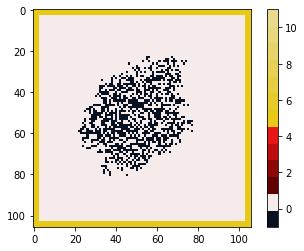

Runtime   87.37904040000012
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


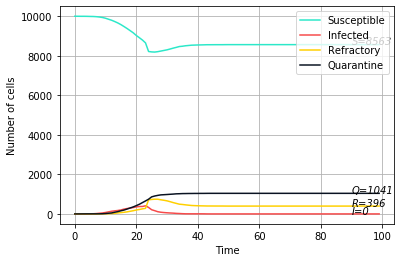

Susceptible = 8563
Infected = 0
Refractory = 396
Quarantined = 1041


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


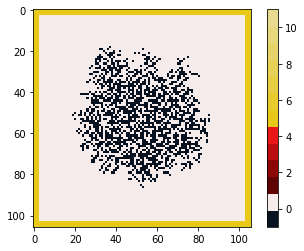

Runtime   95.72936089999985
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


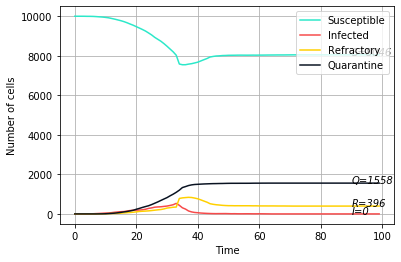

Susceptible = 8046
Infected = 0
Refractory = 396
Quarantined = 1558


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


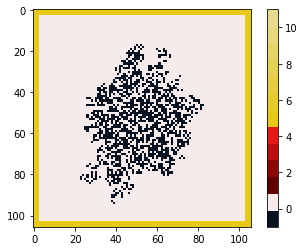

Runtime   88.95750060000046
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


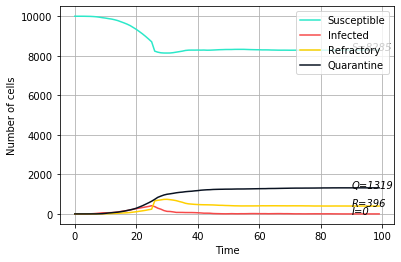

Susceptible = 8285
Infected = 0
Refractory = 396
Quarantined = 1319


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


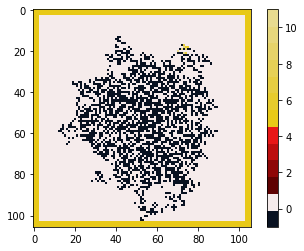

Runtime   88.81132660000003
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


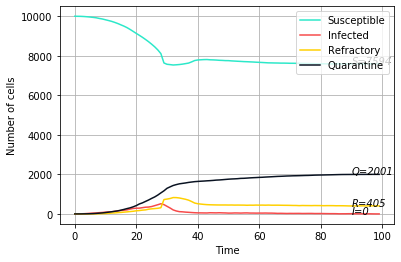

Susceptible = 7594
Infected = 0
Refractory = 405
Quarantined = 2001


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


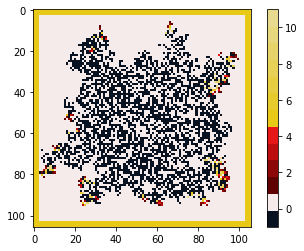

Runtime   88.07896199999959
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


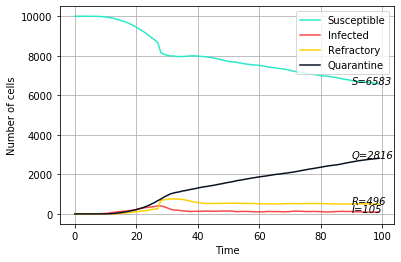

Susceptible = 6583
Infected = 105
Refractory = 496
Quarantined = 2816


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


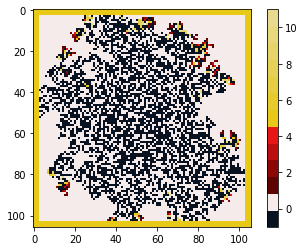

Runtime   83.27805320000061
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


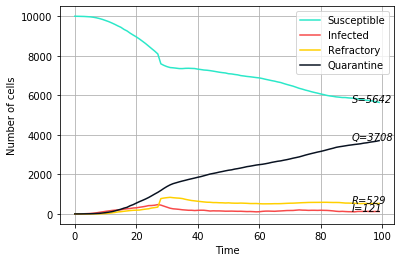

Susceptible = 5642
Infected = 121
Refractory = 529
Quarantined = 3708


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


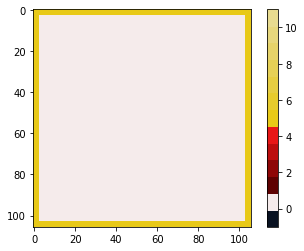

Runtime   147.73714860000018
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


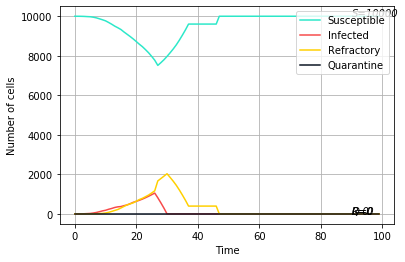

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


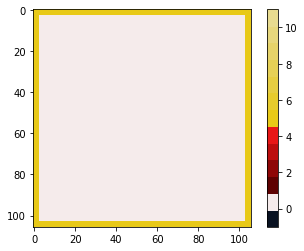

Runtime   146.80537960000038
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


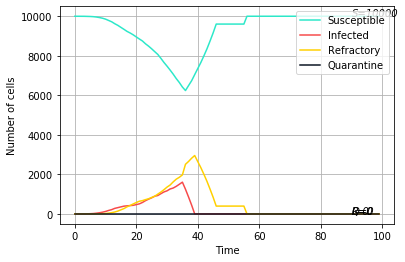

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


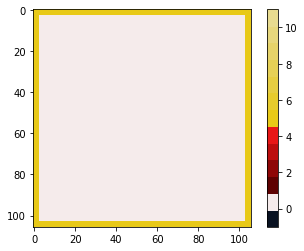

Runtime   123.91368669999974
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


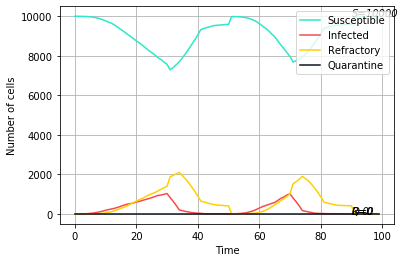

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


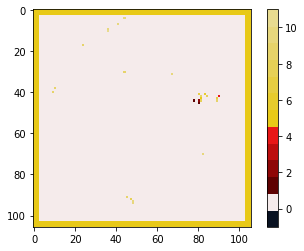

Runtime   120.78281160000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


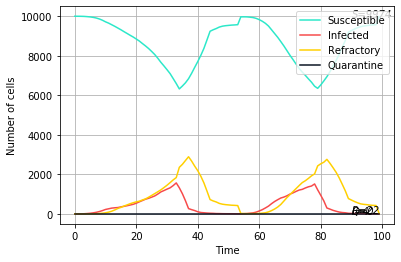

Susceptible = 9974
Infected = 4
Refractory = 22
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


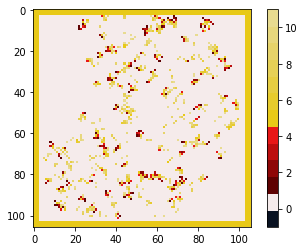

Runtime   105.43695230000048
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


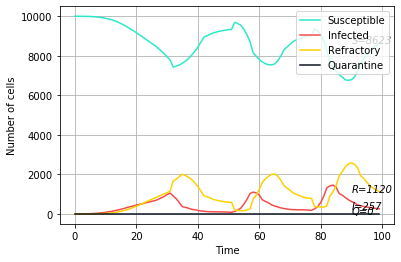

Susceptible = 8623
Infected = 257
Refractory = 1120
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


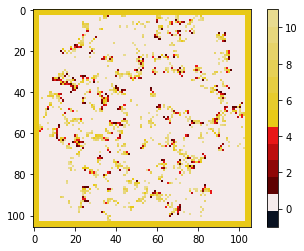

Runtime   107.35289490000014
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


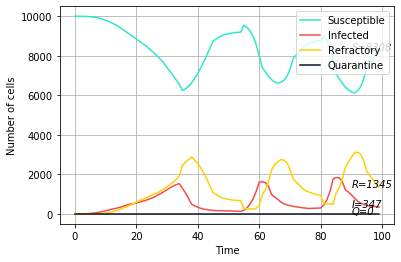

Susceptible = 8308
Infected = 347
Refractory = 1345
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


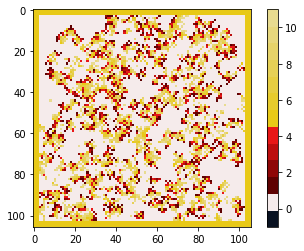

Runtime   92.96357259999968
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


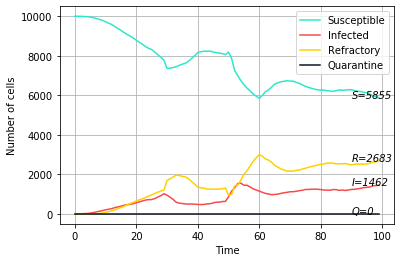

Susceptible = 5855
Infected = 1462
Refractory = 2683
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


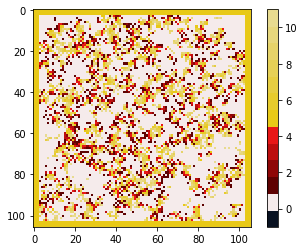

Runtime   95.72229299999981
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


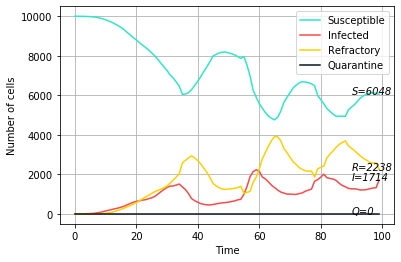

Susceptible = 6048
Infected = 1714
Refractory = 2238
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


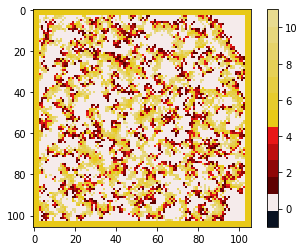

Runtime   86.2158073999999
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


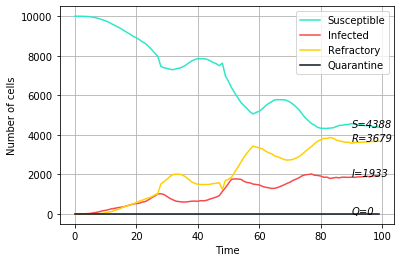

Susceptible = 4388
Infected = 1933
Refractory = 3679
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


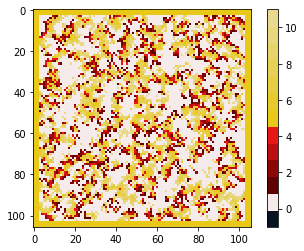

Runtime   87.95130759999938
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


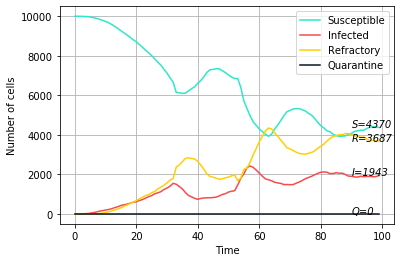

Susceptible = 4370
Infected = 1943
Refractory = 3687
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


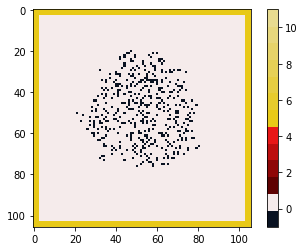

Runtime   75.39277560000028
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


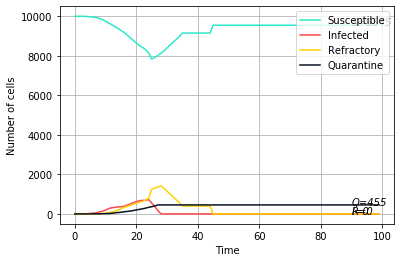

Susceptible = 9545
Infected = 0
Refractory = 0
Quarantined = 455


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


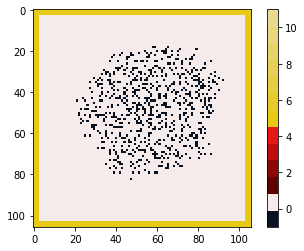

Runtime   62.86619299999984
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


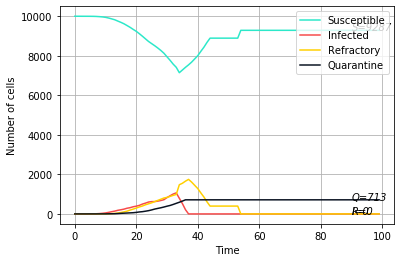

Susceptible = 9287
Infected = 0
Refractory = 0
Quarantined = 713


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


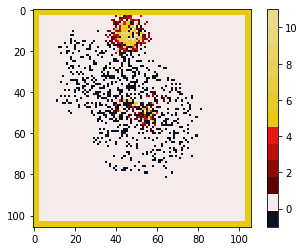

Runtime   54.49851349999972
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


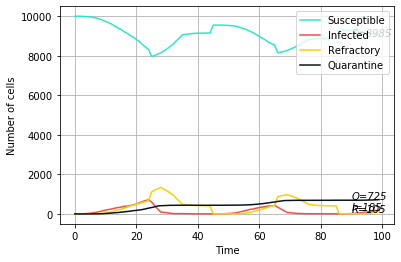

Susceptible = 8985
Infected = 185
Refractory = 105
Quarantined = 725


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


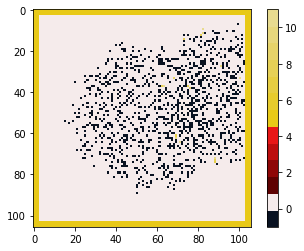

Runtime   54.49408720000065
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


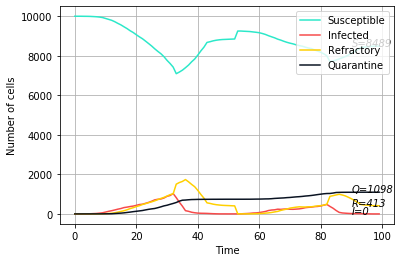

Susceptible = 8489
Infected = 0
Refractory = 413
Quarantined = 1098


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


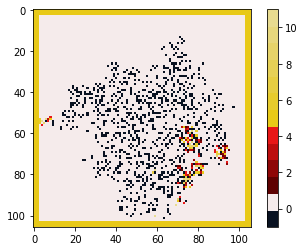

Runtime   45.17076830000042
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


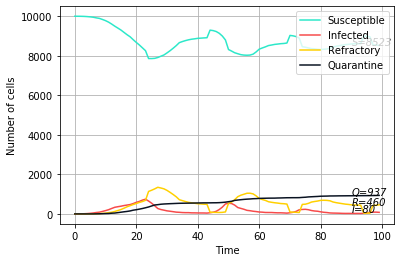

Susceptible = 8523
Infected = 80
Refractory = 460
Quarantined = 937


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


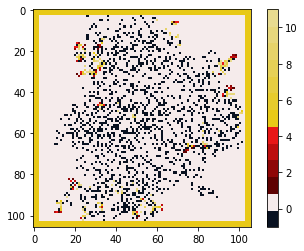

Runtime   47.24404790000062
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


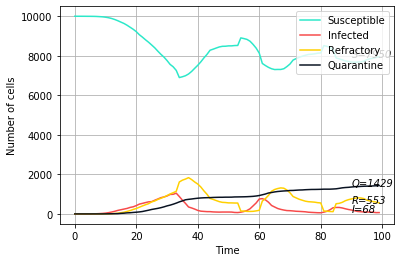

Susceptible = 7950
Infected = 68
Refractory = 553
Quarantined = 1429


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


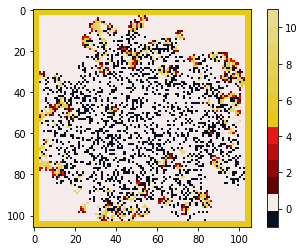

Runtime   39.89313419999962
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


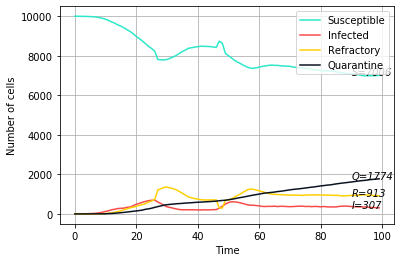

Susceptible = 7006
Infected = 307
Refractory = 913
Quarantined = 1774


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


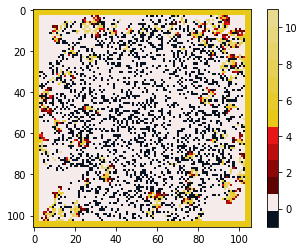

Runtime   41.0570146
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


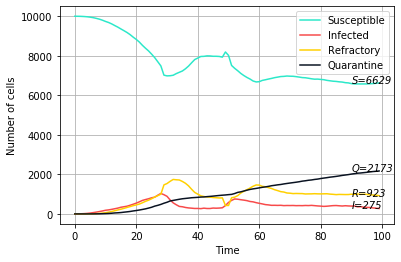

Susceptible = 6629
Infected = 275
Refractory = 923
Quarantined = 2173


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


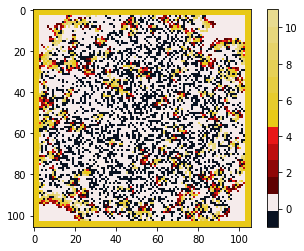

Runtime   39.131325899999865
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


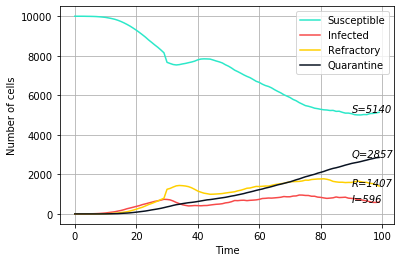

Susceptible = 5140
Infected = 596
Refractory = 1407
Quarantined = 2857


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


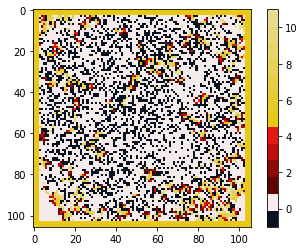

Runtime   39.09058360000017
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


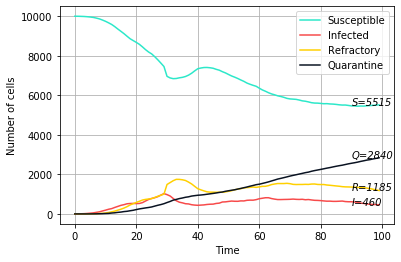

Susceptible = 5515
Infected = 460
Refractory = 1185
Quarantined = 2840


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


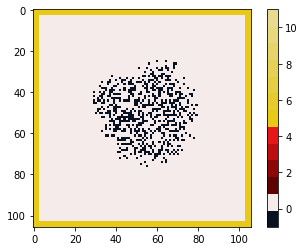

Runtime   63.51378779999959
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


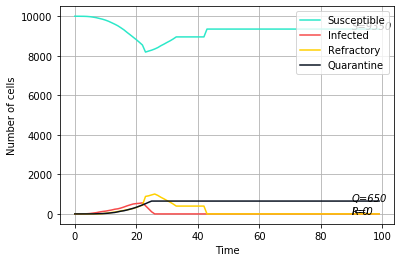

Susceptible = 9350
Infected = 0
Refractory = 0
Quarantined = 650


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


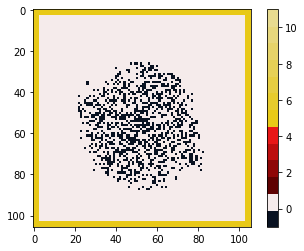

Runtime   61.77876639999977
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


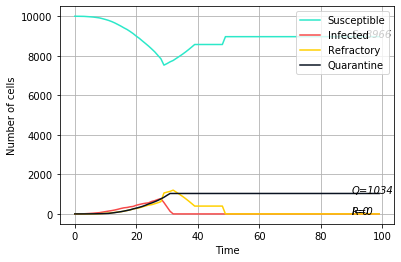

Susceptible = 8966
Infected = 0
Refractory = 0
Quarantined = 1034


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


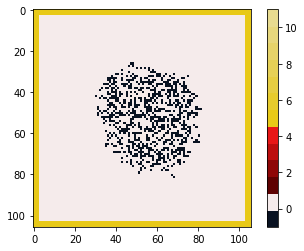

Runtime   63.16769380000005
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


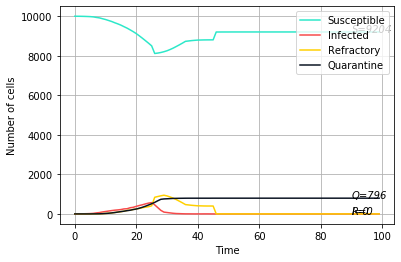

Susceptible = 9204
Infected = 0
Refractory = 0
Quarantined = 796


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


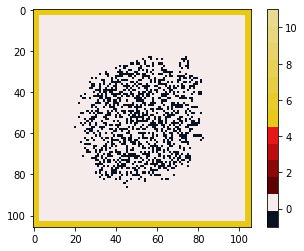

Runtime   62.1562741000007
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


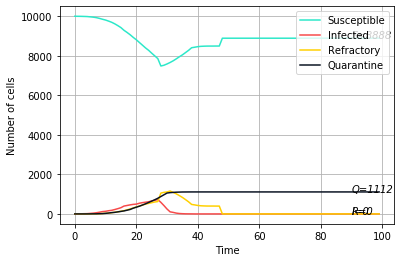

Susceptible = 8888
Infected = 0
Refractory = 0
Quarantined = 1112


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


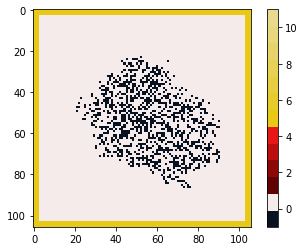

Runtime   42.93053140000029
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


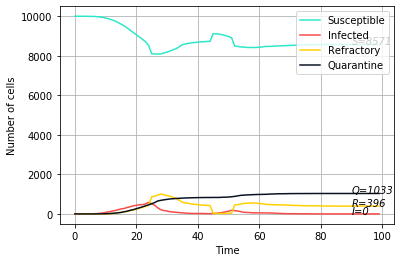

Susceptible = 8571
Infected = 0
Refractory = 396
Quarantined = 1033


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


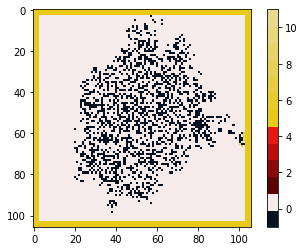

Runtime   42.264011299999765
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


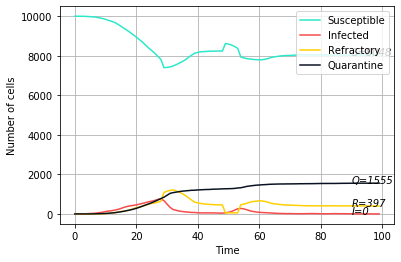

Susceptible = 8048
Infected = 0
Refractory = 397
Quarantined = 1555


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


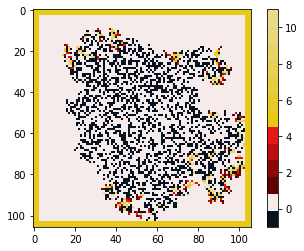

Runtime   37.975594999999885
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


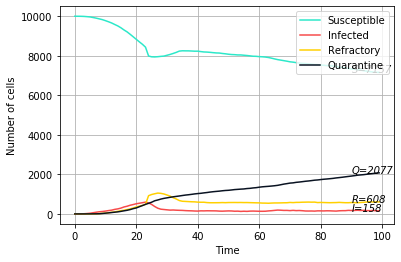

Susceptible = 7157
Infected = 158
Refractory = 608
Quarantined = 2077


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


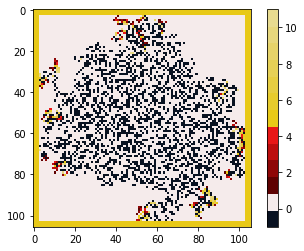

Runtime   39.153932400000485
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


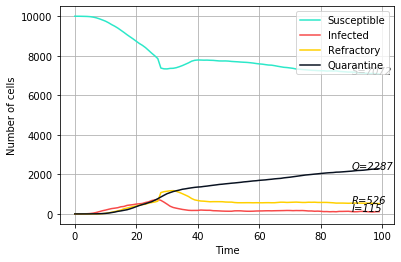

Susceptible = 7072
Infected = 115
Refractory = 526
Quarantined = 2287


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


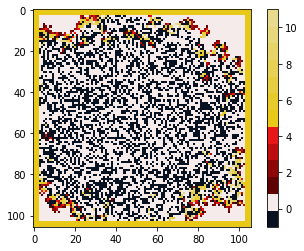

Runtime   36.96181190000061
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


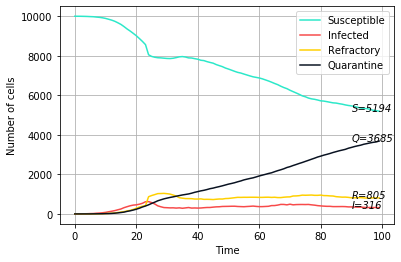

Susceptible = 5194
Infected = 316
Refractory = 805
Quarantined = 3685


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


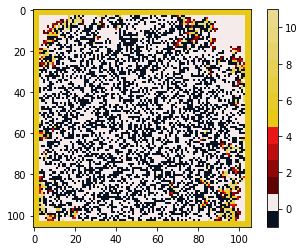

Runtime   37.69595329999993
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


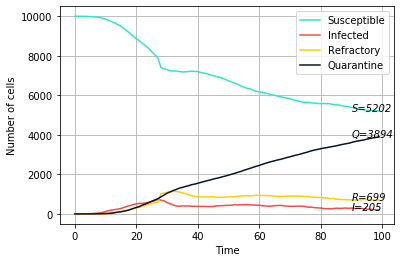

Susceptible = 5202
Infected = 205
Refractory = 699
Quarantined = 3894


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


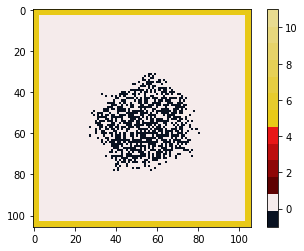

Runtime   64.22790750000058
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


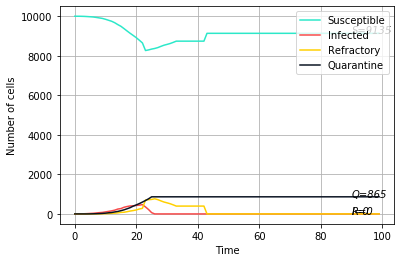

Susceptible = 9135
Infected = 0
Refractory = 0
Quarantined = 865


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


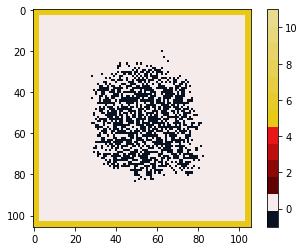

Runtime   60.38723399999981
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


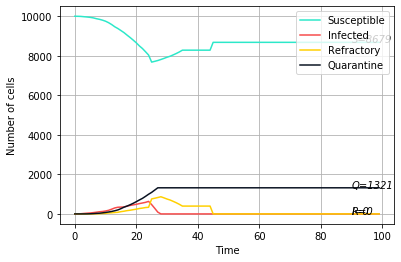

Susceptible = 8679
Infected = 0
Refractory = 0
Quarantined = 1321


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


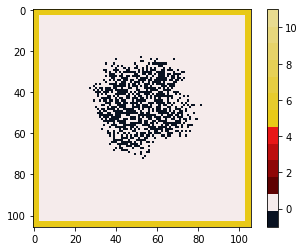

Runtime   63.38397350000014
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


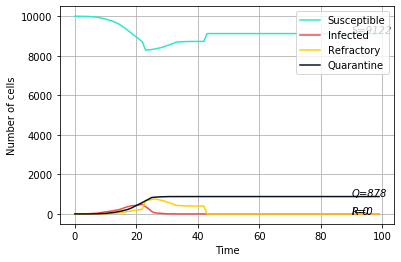

Susceptible = 9122
Infected = 0
Refractory = 0
Quarantined = 878


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


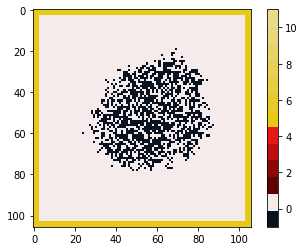

Runtime   67.1295452000004
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


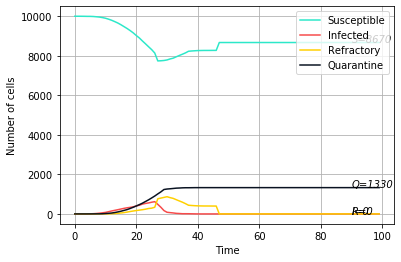

Susceptible = 8670
Infected = 0
Refractory = 0
Quarantined = 1330


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


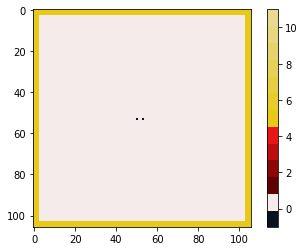

Runtime   78.20052110000051
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


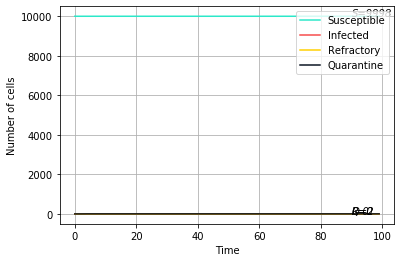

Susceptible = 9998
Infected = 0
Refractory = 0
Quarantined = 2


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


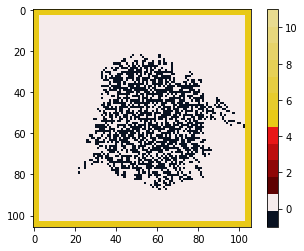

Runtime   39.88186059999953
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


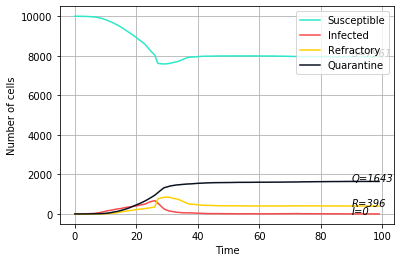

Susceptible = 7961
Infected = 0
Refractory = 396
Quarantined = 1643


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


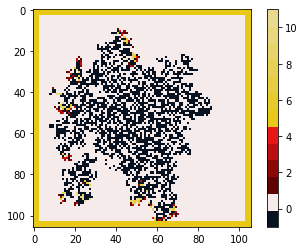

Runtime   37.10857880000003
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


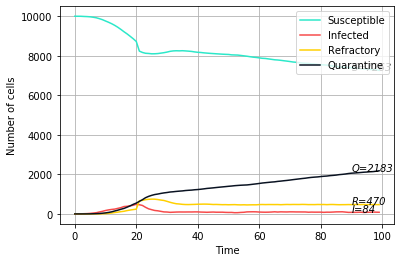

Susceptible = 7263
Infected = 84
Refractory = 470
Quarantined = 2183


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


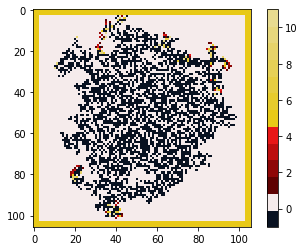

Runtime   36.87463690000004
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


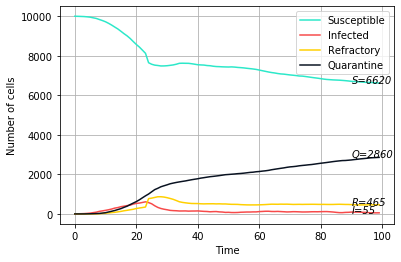

Susceptible = 6620
Infected = 55
Refractory = 465
Quarantined = 2860


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


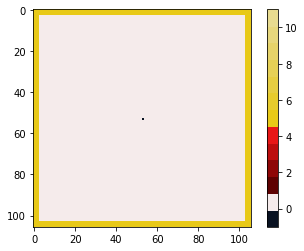

Runtime   77.2634680000001
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


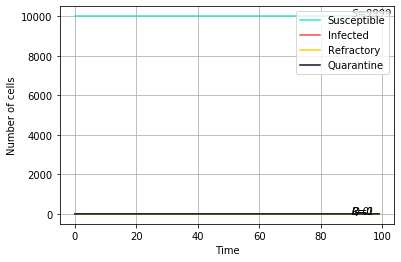

Susceptible = 9999
Infected = 0
Refractory = 0
Quarantined = 1


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


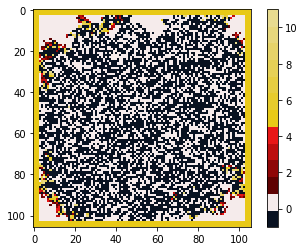

Runtime   35.09577790000003
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


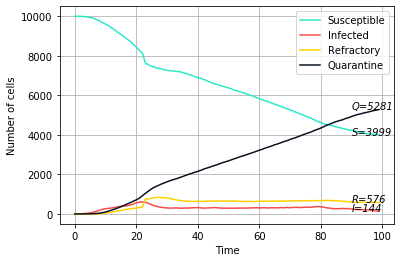

Susceptible = 3999
Infected = 144
Refractory = 576
Quarantined = 5281


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


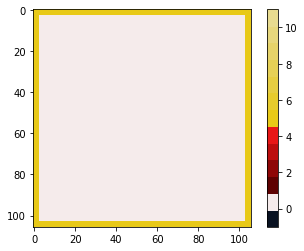

Runtime   67.34040019999975
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


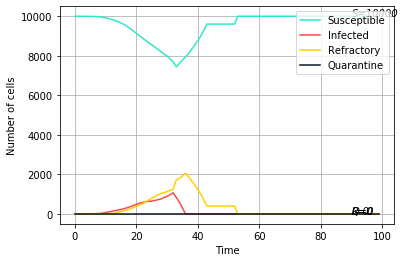

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


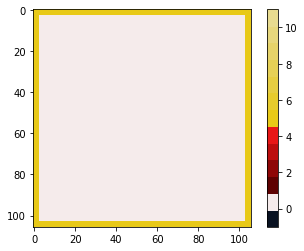

Runtime   65.17723699999988
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


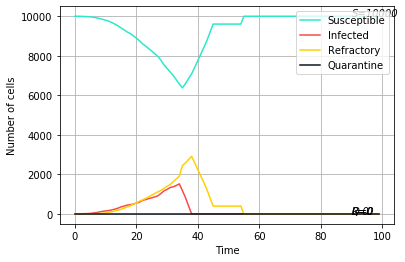

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


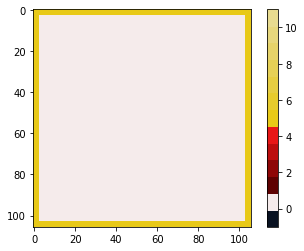

Runtime   66.71376520000013
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


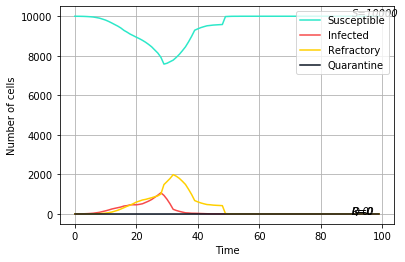

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


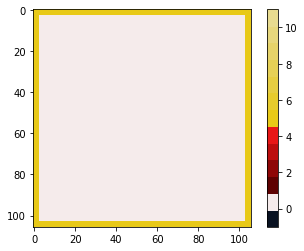

Runtime   65.00621580000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


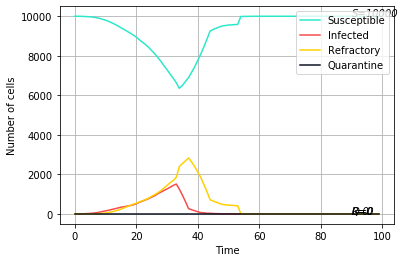

Susceptible = 10000
Infected = 0
Refractory = 0
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


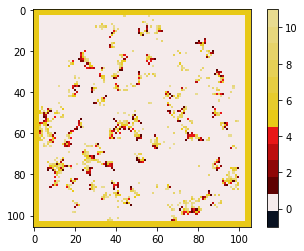

Runtime   47.457551200000125
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


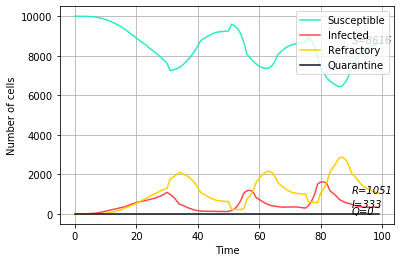

Susceptible = 8616
Infected = 333
Refractory = 1051
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


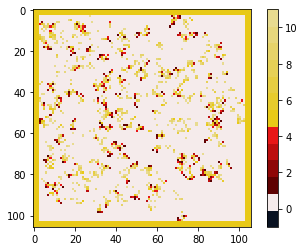

Runtime   48.01472990000002
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


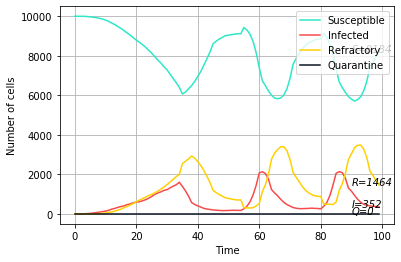

Susceptible = 8184
Infected = 352
Refractory = 1464
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


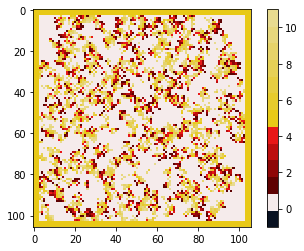

Runtime   41.185470199999145
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


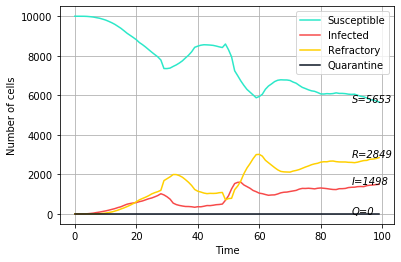

Susceptible = 5653
Infected = 1498
Refractory = 2849
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


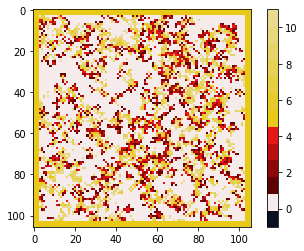

Runtime   42.59939730000042
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


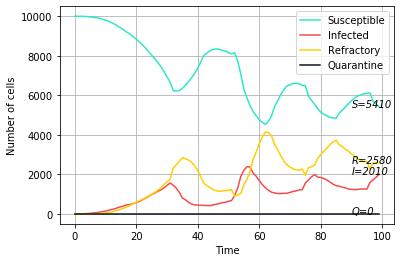

Susceptible = 5410
Infected = 2010
Refractory = 2580
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


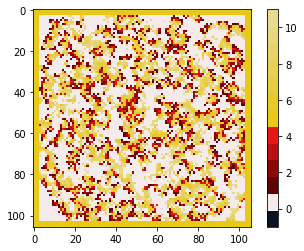

Runtime   40.18644310000127
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


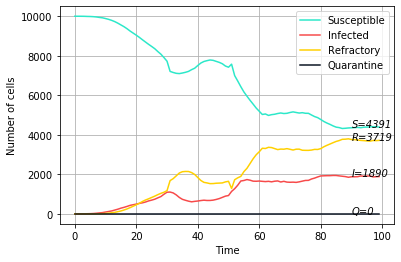

Susceptible = 4391
Infected = 1890
Refractory = 3719
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


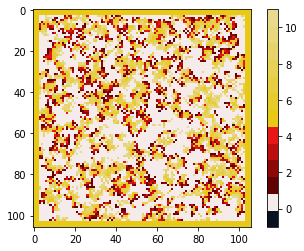

Runtime   41.98700110000027
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


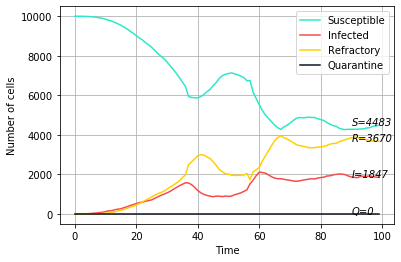

Susceptible = 4483
Infected = 1847
Refractory = 3670
Quarantined = 0


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


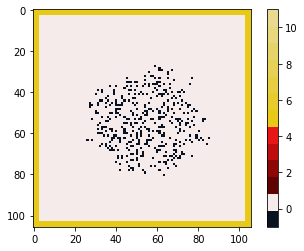

Runtime   65.56795199999942
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


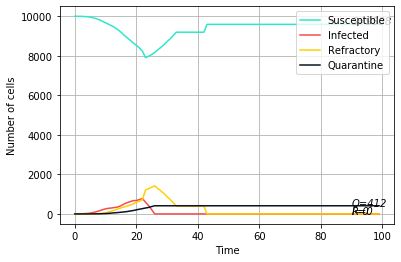

Susceptible = 9588
Infected = 0
Refractory = 0
Quarantined = 412


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


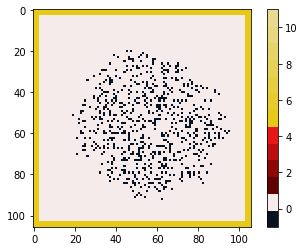

Runtime   63.98092849999921
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


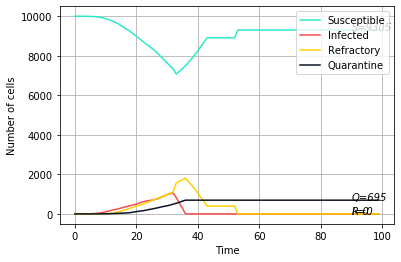

Susceptible = 9305
Infected = 0
Refractory = 0
Quarantined = 695


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


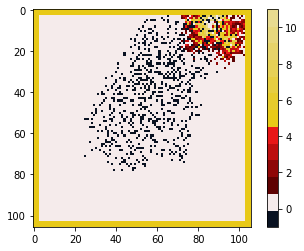

Runtime   54.97563700000137
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


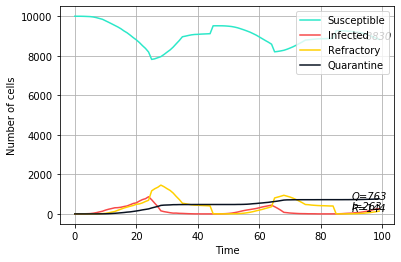

Susceptible = 8830
Infected = 263
Refractory = 144
Quarantined = 763


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


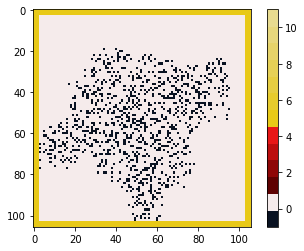

Runtime   54.104186200000186
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


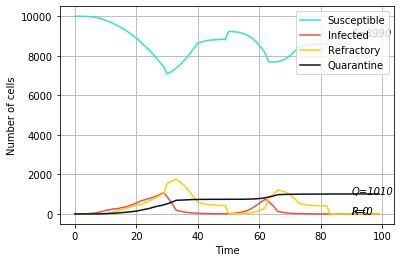

Susceptible = 8990
Infected = 0
Refractory = 0
Quarantined = 1010


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


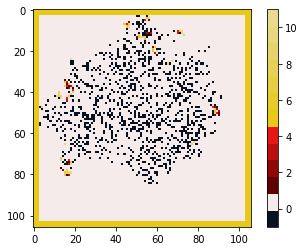

Runtime   43.48311250000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


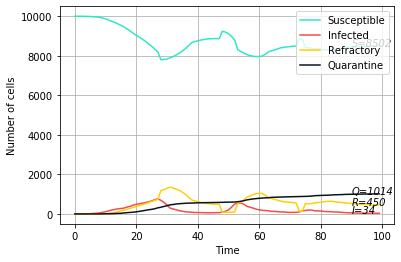

Susceptible = 8502
Infected = 34
Refractory = 450
Quarantined = 1014


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


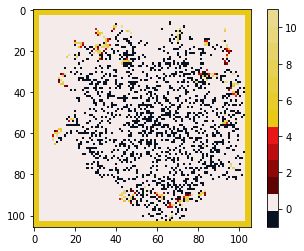

Runtime   46.55617819999861
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


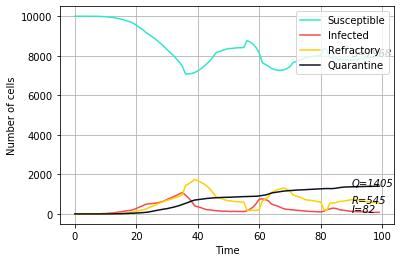

Susceptible = 7968
Infected = 82
Refractory = 545
Quarantined = 1405


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


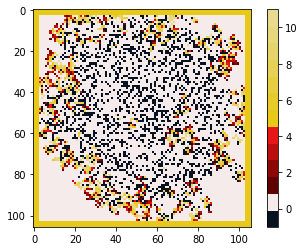

Runtime   40.465109999999186
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


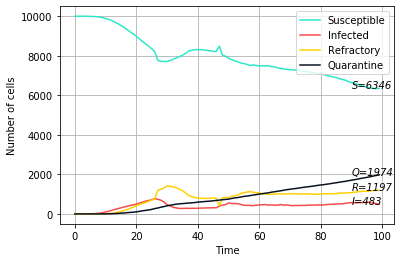

Susceptible = 6346
Infected = 483
Refractory = 1197
Quarantined = 1974


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


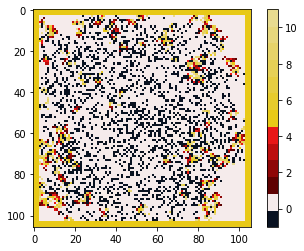

Runtime   41.87409600000137
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


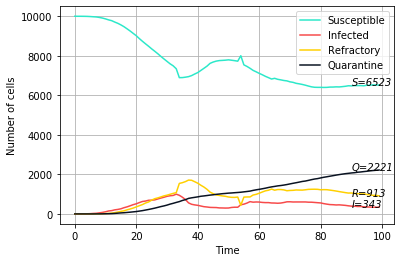

Susceptible = 6523
Infected = 343
Refractory = 913
Quarantined = 2221


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


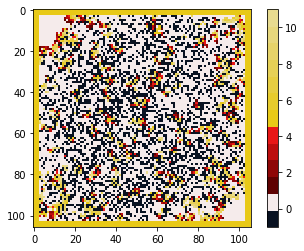

Runtime   36.816903200000525
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


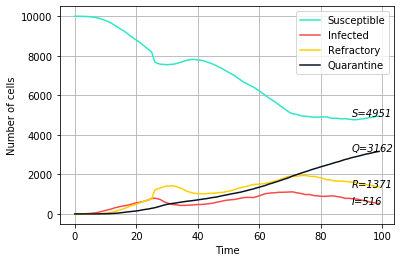

Susceptible = 4951
Infected = 516
Refractory = 1371
Quarantined = 3162


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


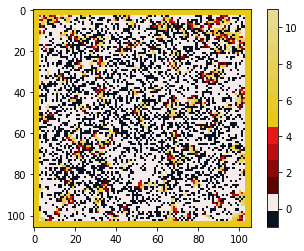

Runtime   38.562058499999694
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


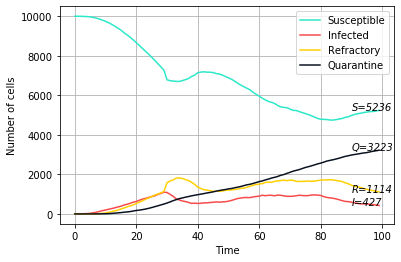

Susceptible = 5236
Infected = 427
Refractory = 1114
Quarantined = 3223


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


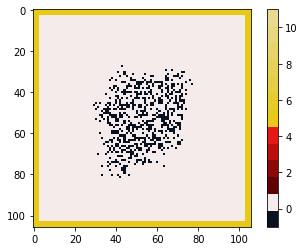

Runtime   64.65487919999941
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


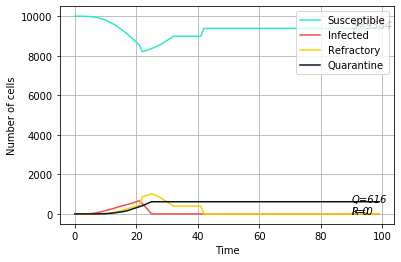

Susceptible = 9384
Infected = 0
Refractory = 0
Quarantined = 616


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


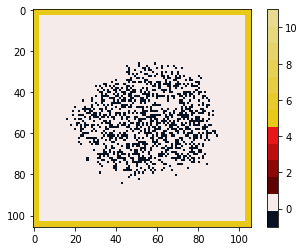

Runtime   67.7180800999995
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


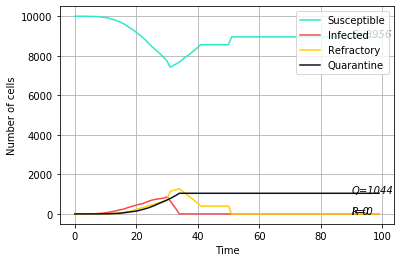

Susceptible = 8956
Infected = 0
Refractory = 0
Quarantined = 1044


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


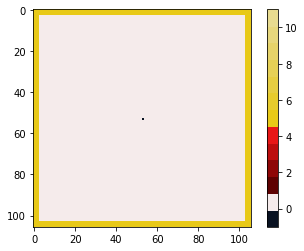

Runtime   75.67847930000062
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


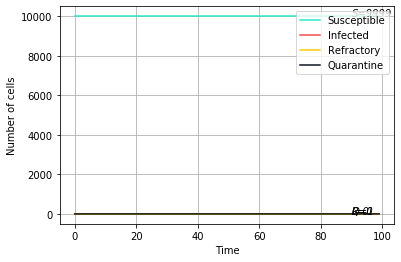

Susceptible = 9999
Infected = 0
Refractory = 0
Quarantined = 1


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


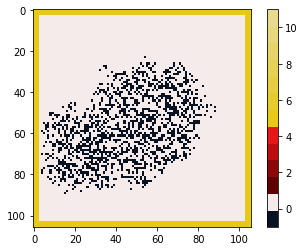

Runtime   58.33953870000005
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


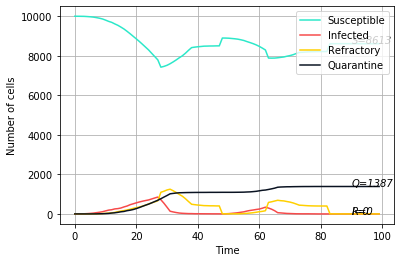

Susceptible = 8613
Infected = 0
Refractory = 0
Quarantined = 1387


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


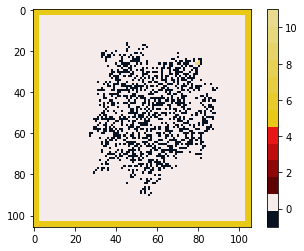

Runtime   42.732313099999374
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


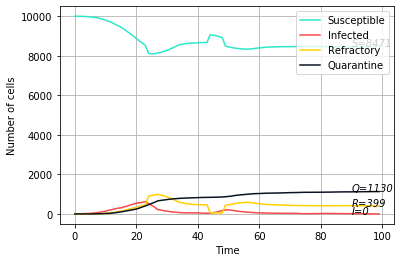

Susceptible = 8471
Infected = 0
Refractory = 399
Quarantined = 1130


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


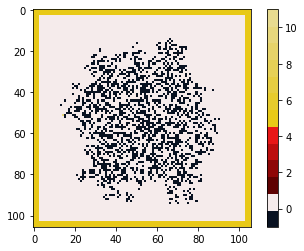

Runtime   42.82184459999917
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


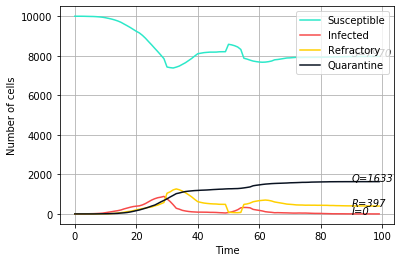

Susceptible = 7970
Infected = 0
Refractory = 397
Quarantined = 1633


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


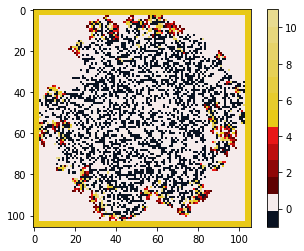

Runtime   40.10462390000066
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


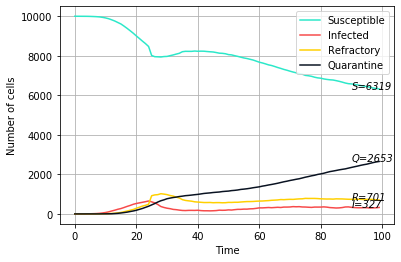

Susceptible = 6319
Infected = 327
Refractory = 701
Quarantined = 2653


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


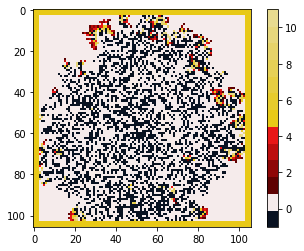

Runtime   44.97158479999962
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


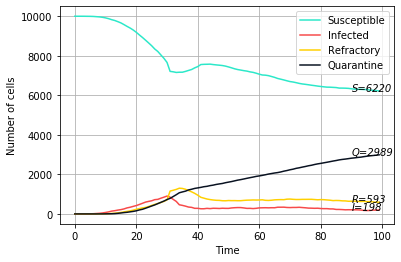

Susceptible = 6220
Infected = 198
Refractory = 593
Quarantined = 2989


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


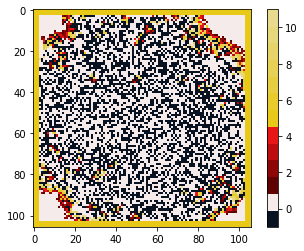

Runtime   39.41509419999966
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


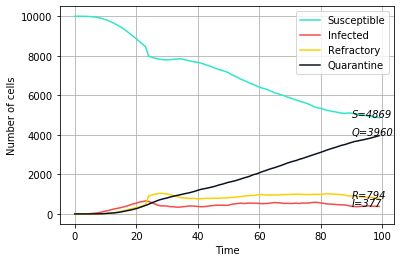

Susceptible = 4869
Infected = 377
Refractory = 794
Quarantined = 3960


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


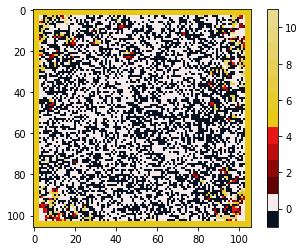

Runtime   41.69032569999945
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


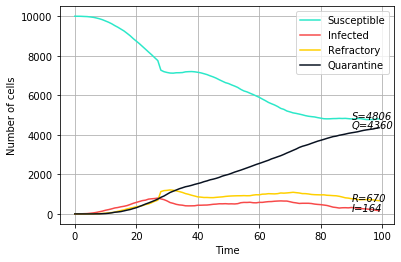

Susceptible = 4806
Infected = 164
Refractory = 670
Quarantined = 4360


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


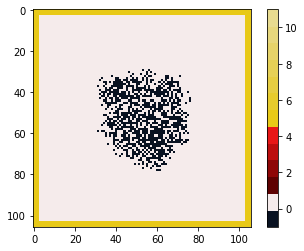

Runtime   88.6264443
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


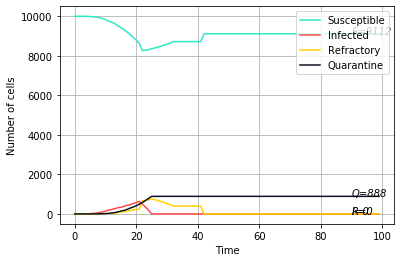

Susceptible = 9112
Infected = 0
Refractory = 0
Quarantined = 888


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


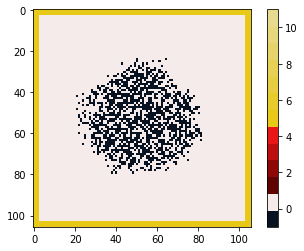

Runtime   139.5476591000006
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


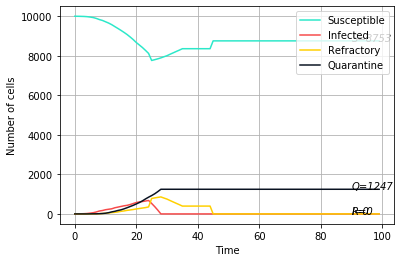

Susceptible = 8753
Infected = 0
Refractory = 0
Quarantined = 1247


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


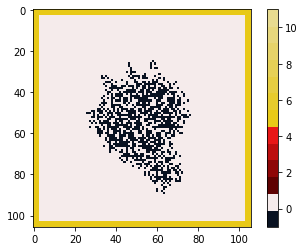

Runtime   93.88830299999972
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


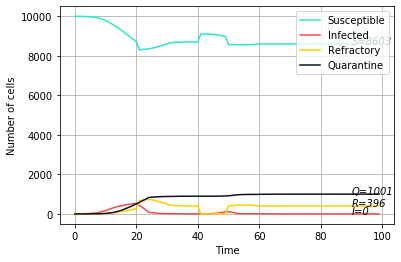

Susceptible = 8603
Infected = 0
Refractory = 396
Quarantined = 1001


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


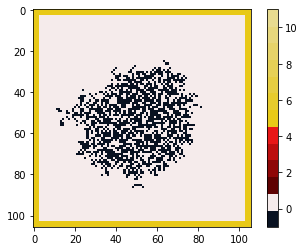

Runtime   138.34117089999927
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


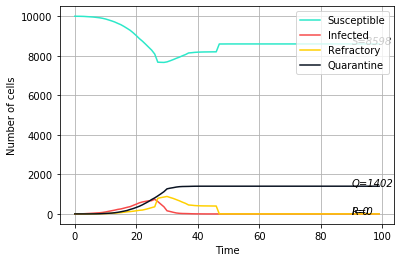

Susceptible = 8598
Infected = 0
Refractory = 0
Quarantined = 1402


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


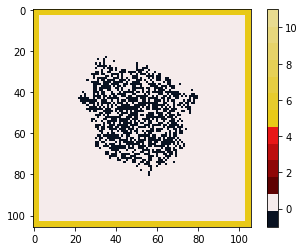

Runtime   92.16892449999978
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


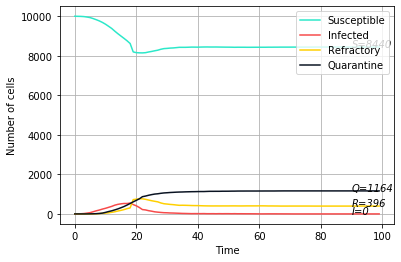

Susceptible = 8440
Infected = 0
Refractory = 396
Quarantined = 1164


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


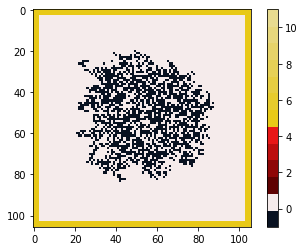

Runtime   99.71469260000049
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


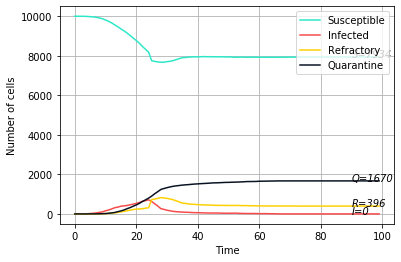

Susceptible = 7934
Infected = 0
Refractory = 396
Quarantined = 1670


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


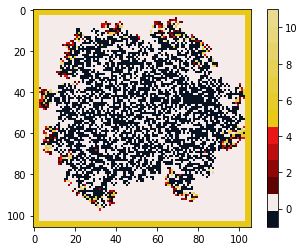

Runtime   91.16418989999875
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


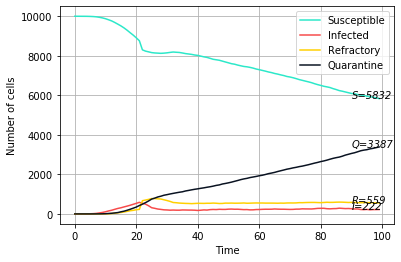

Susceptible = 5832
Infected = 222
Refractory = 559
Quarantined = 3387


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


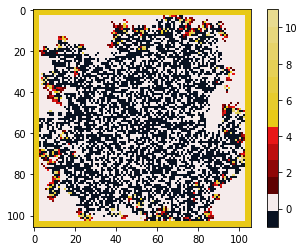

Runtime   93.11147279999932
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


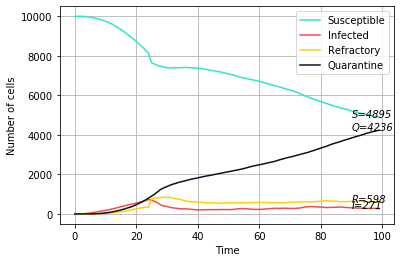

Susceptible = 4895
Infected = 271
Refractory = 598
Quarantined = 4236


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


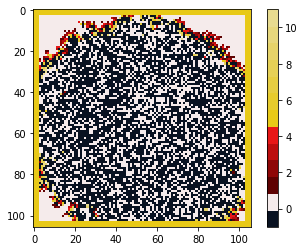

Runtime   77.79834759999903
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


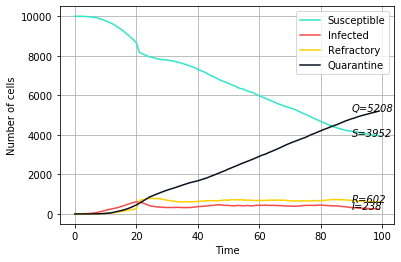

Susceptible = 3952
Infected = 238
Refractory = 602
Quarantined = 5208


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


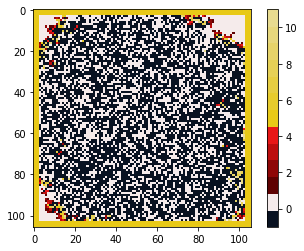

Runtime   80.32826470000145
100 100 100 100


C:\Users\kunal\anaconda3\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


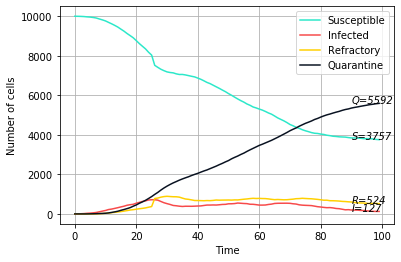

Susceptible = 3757
Infected = 127
Refractory = 524
Quarantined = 5592


In [10]:
#Randomly distributed initial population with only susceptible and refractory at different stages. Only one infected in the middle.
#leads to persisting infection waves.


#MAIN PROGRAM

#parameters

for day in np.arange(1,4):
    for p_quarantine in np.arange(0,0.8,0.2):
        for lockdown_factor in np.arange(0,1,0.2):
            for lock_bound in np.arange(1000,2000,500):
                
                radius=3
                det_prob=1   #Deterministic((2*radius+1)**2 -1) or Probablistic(1) Automata
                t_i=4                           # 1<=t<=t_i is the infected range
                t_r=7                           # t_i+1<=t<=t_i+t_r is the refractory range
                x_dim=100
                y_dim=100
                time=100
                cmap = customcmap(t_i, t_r)


                #total weight due to r!=1
                weight_sum=0
                for a in np.arange(1,radius+1):
                    weight_sum = weight_sum + ((radius-(a-1))*(8*a))
                
                #INITIAL CONDITIONS
                
                
                #Distribution of Initial Population
                
                tau_list=np.zeros(((x_dim + 2*radius)*(y_dim + 2*radius)), dtype=int)  
                #p_ref=0.3  #initial percentage of refractory population
                
                #for k in range ((x_dim + 2*radius)*(y_dim + 2*radius)):
                #    rand=(np.random.random())
                #    if(0<=rand<=p_ref):
                #        rand2=int(np.random.randint(low=1,high=7))
                #        tau_list[k]=tau_list[k]+rand2+t_i
                    
                tau=np.reshape(tau_list,(x_dim+2*radius,y_dim+2*radius))
                
                
                #BOUNDARY CONDITIONS 
                i=0
                for i in range(radius):                 #All borders of width = (radius) are fixed boundaries.
                    tau[:,i]=t_i+1
                    tau[i,:]=t_i+1
                    tau[:,y_dim+(2*radius-(i+1))]=t_i+1
                    tau[x_dim+(2*radius-(i+1)),:]=t_i+1
                
                tau[(x_dim+2*radius)//2,(y_dim+2*radius)//2]=1  #single infection in the middle




                suslist=[]
                inflist=[]
                reflist=[]
                qualist=[]
                tarray=np.arange(time)
                
                start = timer()
                fig=plt.figure()
                state=tau.copy()
                sus,inf,ref,qua =datastats(state, x_dim, y_dim, t_i, t_r, radius)
                suslist.append(sus)
                inflist.append(inf)
                reflist.append(ref)
                qualist.append(qua)
                plt.colorbar(plt.imshow(state, cmap=cmap, interpolation = 'nearest', vmin = -1, vmax = t_i+t_r))
                ims=[]                 
                im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                ims.append([im])
                t=1
                while(t<time):
                    x=0  
                    
                    if(inf+qua>=lock_bound):
                        while(x<20 and t<time):
                            state_new=propogator(state,x_dim,y_dim,t_i,t_r,det_prob,1,8,radius,lockdown_factor,day,p_quarantine)
                            state=state_new.copy()
                            sus,inf,ref,qua=datastats(state, x_dim, y_dim, t_i, t_r, 1)
                            suslist.append(sus)
                            inflist.append(inf)
                            reflist.append(ref)
                            qualist.append(qua)
                            im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                            ims.append([im])      
                            x=x+1
                            t=t+1
                    else:
                        state_new=propogator(state,x_dim,y_dim,t_i,t_r,det_prob,radius,weight_sum,radius,1,day,p_quarantine)
                        state=state_new.copy()
                        sus,inf,ref,qua=datastats(state, x_dim, y_dim, t_i, t_r, radius)
                        suslist.append(sus)
                        inflist.append(inf)
                        reflist.append(ref)
                        qualist.append(qua)
                        im=plt.imshow(state, animated=True, cmap = cmap, vmin = -1, vmax = t_i+t_r)
                        ims.append([im])      
                        t=t+1
        
                ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
                ani.save('GIF  '+ 'lf= '+ str(lockdown_factor)+ ', p_quar= '+ str(p_quarantine)+ ', day= '+ str(day) + ', lockdown_bound= '+ str(lock_bound)+'.gif', writer='imagemagick', fps=10)
                #check for changes on github
                end = timer()
                plt.show()

                print("Runtime  ",end-start)
                print(len(inflist),len(suslist),len(reflist),len(qualist))
                y=[suslist[time-1], inflist[time-1], reflist[time-1], qualist[time-1]]
                fig = plt.figure()
                plt.plot(tarray, suslist,'#2ce8c9', label="Susceptible")
                plt.plot(tarray, inflist,'#f74a4a', label="Infected")
                plt.plot(tarray, reflist,'#ffd000', label="Refractory")
                plt.plot(tarray, qualist,'#091221', label="Quarantine")
                plt.legend(loc="upper right")
                plt.grid(True)
                plt.xlabel('Time')
                plt.ylabel('Number of cells')
                ax = fig.add_subplot(111)
                ax.text(time-10, suslist[time-1], 'S='+str(suslist[time-1]), style='italic')
                ax.text(time-10, inflist[time-1], 'I='+str(inflist[time-1]), style='italic')
                ax.text(time-10, reflist[time-1], 'R='+str(reflist[time-1]), style='italic')
                ax.text(time-10, qualist[time-1], 'Q='+str(qualist[time-1]), style='italic')
    
                plt.savefig('PLOT  ' + 'lf= '+ str(lockdown_factor)+ ', p_quar= '+ str(p_quarantine)+ ', day= '+ str(day) + ', lockdown_bound= '+ str(lock_bound)+ '.png', dpi=(250))
                plt.show()
                print("Susceptible =", suslist[time-1])
                print("Infected =", inflist[time-1])
                print("Refractory =", reflist[time-1])
                print("Quarantined =", qualist[time-1])
